<a href="https://colab.research.google.com/github/riddhikaa/csir_npl_work/blob/main/breast_Cancer_1500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
!pip install category_encoders==2.6.0
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, svm, model_selection, tree, ensemble, neighbors, preprocessing, base, metrics
import category_encoders
import imblearn

In [80]:
warnings.filterwarnings("ignore")

In [81]:
file_path = '/content/drive/MyDrive/breastcancer_data/original_Breast_GSE70947.xlsx'
df = pd.read_excel(file_path)

In [82]:
print(df.shape)

(289, 16384)


In [83]:
#selecting only 1000 features out of 16384
selected_columns = df.columns[:1500]
df_selected = df[selected_columns]
df_selected.head()

,samples,type,NM_144987,NM_013290,ENST00000322831,NM_001625,lincRNA:chr7:226042-232442_R,NM_032391,ENST00000238571,XR_108906,...,NM_018243,lincRNA:chr11:88014877-88020577_R,A_33_P3387911,NM_001039690,NM_032600,NM_145027,A_33_P3383531,NM_020320,NM_005765,NM_012189
0,GSM1823702_252800417016_S01_GE1_107_Sep09_1_2,normal,8.693318,7.718016,6.044438,10.747077,9.133777,4.735581,5.634732,4.670231,...,12.712699,5.090500,4.629096,9.949241,4.610070,5.546402,4.690565,12.477809,11.774110,6.480444
1,GSM1823703_252800417016_S01_GE1_107_Sep09_2_1,normal,9.375980,7.072232,6.976741,10.429671,9.526500,5.221089,5.425187,4.860931,...,11.916140,4.476987,4.411587,9.833155,5.500071,5.884042,5.221089,12.351534,12.805733,5.939156
2,GSM1823704_252800416877_S01_GE1_107_Sep09_2_3,normal,8.943442,7.964573,6.269055,10.825025,9.396855,5.258506,5.824921,4.964604,...,13.014613,4.553611,4.463017,10.161488,4.677791,5.400286,4.801737,12.731217,11.524477,6.606328
3,GSM1823705_252800416894_S01_GE1_107_Sep09_1_1,normal,9.020798,7.824639,6.165165,11.646788,8.776462,4.648655,6.676692,4.770186,...,13.375885,4.464029,4.425219,9.850016,4.451118,5.662184,4.505663,12.447830,11.710790,6.891677
4,GSM1823706_252800416894_S01_GE1_107_Sep09_1_3,normal,8.806154,7.555348,6.230969,11.635247,8.911383,4.518054,6.520691,4.540453,...,12.211735,4.812299,4.362715,9.494137,4.472849,4.993831,4.727091,12.200980,11.383454,7.533667


In [84]:
df.head()
print(f"Total duplicates: {df.duplicated().sum()}") #checking for duplicates
#checking for null values
print(df.isna().sum())
print(f"Total null count: {df.isna().sum().sum()}")

Total duplicates: 0
samples                             0
type                                0
NM_144987                           0
NM_013290                           0
ENST00000322831                     0
                                   ..
NR_003529                           0
NR_036446                           0
NM_001001957                        0
lincRNA:chr7:29652000-29661000_R    0
ENST00000494108                     0
Length: 16384, dtype: int64
Total null count: 0


In [85]:
target = "type"
val_counts = df_selected[target].value_counts()
print(val_counts, "\n\n")


type
normal                   146
breast_adenocarcinoma    143
Name: count, dtype: int64 




([<matplotlib.patches.Wedge at 0x7e6ea0a70160>,
 [Text(-0.017935638819470537, 1.0998537688529952, 'normal'),
  Text(0.01793563881947016, -1.0998537688529952, 'breast_adenocarcinoma')],
 [Text(-0.0097830757197112, 0.5999202375561791, '50.52%'),
  Text(0.009783075719710994, -0.5999202375561791, '49.48%')])

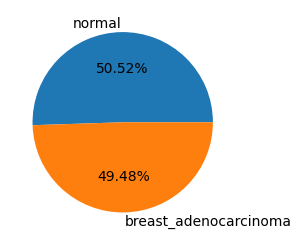

In [86]:
plt.subplot(1, 2, 2)
plt.pie(val_counts, labels = val_counts.keys(), autopct = "%.2f%%")


In [87]:
# Encoding categorical features (Ordinal Encoding)

class_map = {"normal": 0, "breast_adenocarcinoma": 1}
class_map_reverse = {m : n for m, n in zip(class_map.values(), class_map.keys())}

encoder = category_encoders.OrdinalEncoder(cols = [target], mapping = [{"col": target, "mapping": class_map}])
df_selected['type'] = encoder.fit_transform(df_selected[target])

In [88]:
X = df_selected.drop(columns=df_selected.columns[0]).values
y = df_selected[target].values

print(X.shape, y.shape)
print(X)


(289, 1499) (289,)
[[ 0.          8.69331779  7.71801596 ... 12.47780922 11.77410968
   6.48044449]
 [ 0.          9.37597965  7.07223164 ... 12.35153397 12.80573341
   5.93915575]
 [ 0.          8.94344176  7.96457276 ... 12.73121698 11.52447741
   6.60632759]
 ...
 [ 1.          9.0513847   7.65189288 ... 12.81128697 11.51248128
   7.59612039]
 [ 1.          8.11460641  8.09668189 ... 12.57506857 11.46985771
   9.84164473]
 [ 1.          8.82757478  7.53889842 ... 12.33743557 11.49841274
   9.40977529]]


In [122]:
# Splitting the data into testing and training data (Stratified Splitting)
#split: 20% test and 80% train
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
print(X_train.shape, X_test.shape)
X_train

(231, 1499) (58, 1499)


array([[ 0.        ,  9.50738707,  7.88659539, ..., 12.35153397,
        10.95798042,  6.68173038],
       [ 0.        ,  9.0114717 ,  7.70067228, ..., 12.45088089,
        11.52351665,  6.7382455 ],
       [ 0.        ,  9.06698125,  7.96047914, ..., 12.09338592,
        11.5230559 ,  5.86918878],
       ...,
       [ 0.        ,  8.33191753,  7.13775812, ..., 12.59716303,
        11.79992783,  7.82180935],
       [ 1.        ,  9.00394168,  8.09116073, ..., 11.98248614,
        11.19554914, 10.47282677],
       [ 1.        ,  8.73400446,  5.52922027, ..., 12.36492732,
        11.42408892,  6.78631707]])

In [123]:
# Feature Scaling (Z-Score Normalization)

scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train = X_train_scaled.copy()
X_test = X_test_scaled.copy()

print(X_train[0].mean(), X_train[0].std())

0.10578378204895554 1.0602296491661038


Train Set:
0    117
1    114
Name: count, dtype: int64


Test Set:
1    29
0    29
Name: count, dtype: int64




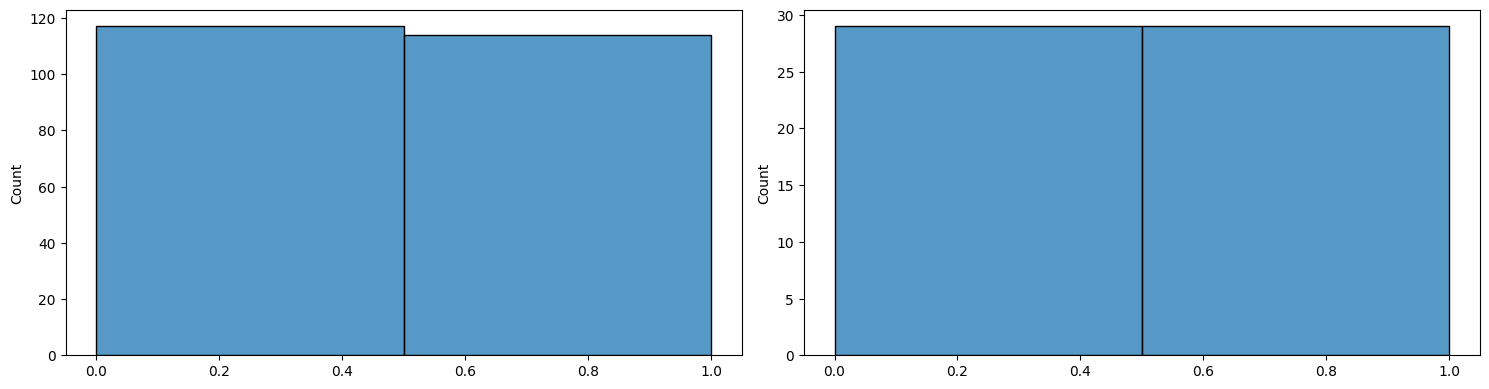

In [124]:
# Checking uniformity of labels across train and test data sets

print(f"Train Set:\n{pd.Series(y_train).value_counts()}\n\n")
print(f"Test Set:\n{pd.Series(y_test).value_counts()}\n\n")

plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
sns.histplot(y_train, bins = len(np.unique(y_train)))

plt.subplot(1, 2, 2)
sns.histplot(y_test, bins = len(np.unique(y_test)))

plt.tight_layout()
plt.show()

In [125]:
# Handling class imbalance through Synthetic Minority Over-sampling Technique (SMOTE)

smote = imblearn.over_sampling.SMOTE(random_state = 3, k_neighbors = 3)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(X_train_resampled.shape, y_train_resampled.shape)

(234, 1499) (234,)


In [126]:
X_train, y_train = X_train_resampled.copy(), y_train_resampled.copy()

In [127]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k = 3  # Number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)

# Train the KNN model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test)

# Evaluating model ki performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN model: {accuracy:.2f}")

Accuracy of KNN model: 0.90


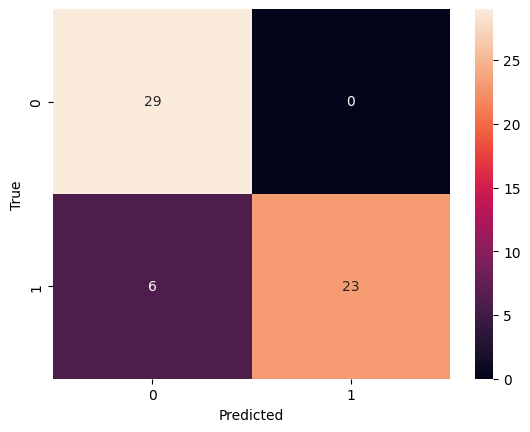

In [128]:
y_test_pred = knn_model.predict(X_test)

conf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot = True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
